# Assignment 7
Our goal in this assignment is to apply our logistic regression technique to some new samples
1.  Apply the technique to the pulsar dataset, but using only two variables.   Plot the cost function and the decision boundary.   Compare the $theta$ values you obtain with your method with the results that you get using the scipy minimization methods.   **NOTE**: you may need to adjust your learning rate and delta parameters to get convergence.
2. Apply the technique to the MINST dataset, using one digit (say 5) as the positive (y=1) class, and another digit (say 7) as the negative (y=0) class.
3. **Extra**: Try to do a simple version of a multi-class classification problem using MNIST: use 3 digits.   Your primary output should be a confusion matrix.   Hint: you will want to loop over the 3 digits, in each case treating that digit as signal, and the others as background.

# 1: Pulsar dataset

In [2]:
import pandas as pd
# Get the feature data
url = "https://raw.githubusercontent.com/big-data-analytics-physics/data/master/HTRU2/HTRU_2a.csv"
dfAll=pd.read_csv(url)
#
# Make sure our dataset is balanced
dfA = dfAll[dfAll['class']==1]
dfB = dfAll[dfAll['class']==0]
dfB_use = dfB.head(len(dfA))
dfCombined = dfB_use
dfCombined = pd.concat([dfCombined, dfA])

print("The size of sample: ", len(dfCombined))
print(dfCombined.head())

corr = dfCombined.corr()
corr.style.background_gradient().set_precision(5)

The size of sample:  3278
   Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis   DM_mean  \
0    140.562500      55.683782         -0.234571         -0.699648  3.199833   
1    102.507812      58.882430          0.465318         -0.515088  1.677258   
2    103.015625      39.341649          0.323328          1.051164  3.121237   
3    136.750000      57.178449         -0.068415         -0.636238  3.642977   
4     88.726562      40.672225          0.600866          1.123492  1.178930   

    DM_stdev  DM_skewness  DM_kurtosis  class  
0  19.110426     7.975532    74.242225      0  
1  14.860146    10.576487   127.393580      0  
2  21.744669     7.735822    63.171909      0  
3  20.959280     6.896499    53.593661      0  
4  11.468720    14.269573   252.567306      0  


,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
Profile_mean,1,0.67483,-0.9406,-0.84188,-0.65164,-0.67574,0.62424,0.43299,-0.77322
Profile_stdev,0.67483,1,-0.71329,-0.72634,-0.27462,-0.37105,0.36298,0.28745,-0.5139
Profile_skewness,-0.9406,-0.71329,1,0.9629,0.66135,0.69015,-0.63811,-0.44402,0.7365
Profile_kurtosis,-0.84188,-0.72634,0.9629,1,0.59489,0.59681,-0.55464,-0.38275,0.60809
DM_mean,-0.65164,-0.27462,0.66135,0.59489,1,0.79293,-0.69377,-0.43412,0.54833
DM_stdev,-0.67574,-0.37105,0.69015,0.59681,0.79293,1,-0.87553,-0.65344,0.72223
DM_skewness,0.62424,0.36298,-0.63811,-0.55464,-0.69377,-0.87553,1,0.91552,-0.6643
DM_kurtosis,0.43299,0.28745,-0.44402,-0.38275,-0.43412,-0.65344,0.91552,1,-0.50194
class,-0.77322,-0.5139,0.7365,0.60809,0.54833,0.72223,-0.6643,-0.50194,1


Looks like the two most correlated features to the class are 'Profile_mean' and 'Profile_skewness'

## All methods

Calculate the lost function: 

$$J(\theta) = \sum_{i=i}^m [-y_i\log(h(X_i\theta)) - (1-y_i)\log(1-h(X_i\theta))]$$

Calculate the gradient of the lost function:

$${ \delta J \over\delta \theta_j}  = \sum_i^m((h(X_i \cdot \theta)-y_i)X_{ij})$$

Therefore, the gradient of the lost function written in vector form is 

$$grad J = X^T[h(X\theta)-Y]$$

$$X_{ij}$$, the jth coordinate of the ith datapoint
$$Y_i$$, the class of ith datapoint

In [0]:
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def loss_func(X, Theta, Y):
    sum = 0.0
    for i in range(len(X)):
        z = np.dot(X[i], Theta)
        sigmoids = sigmoid(z)
        if sigmoids == 0 or sigmoids == 1:
            print(i, "th sigmoids is 0/1")
            print(z)
            
        sum += -Y[i]*np.log(sigmoids) - (1-Y[i])*np.log(1-sigmoids)
    return sum


def grad_loss_func(X, Theta, Y):
    sigmoid_mat = sigmoid(np.dot(X, Theta))
    X_transposed = np.transpose(X)
    gradient = np.dot(X_transposed, (sigmoid_mat-Y))
    return gradient
  
def fit_data(X,Y, Theta, learningRate,max_iterations,delta=0.01):
    m, features = X.shape
    print("The number of datapoints: ", m, "The number of features there are: ", features)
    print("The max number of iterations: ", max_iterations)
    
    #print('The initial guess of Theta', Theta)
    
    CostList = []
    ThetaList = []
    cost = loss_func(X, Theta, Y)
    print("The initial cost of the guess is: ", cost)
    
    try:
        for iteration in range(0, max_iterations):
            last_cost = cost
            gradient = grad_loss_func(X, Theta, Y)
            Theta = Theta - learningRate * gradient
            cost = loss_func(X, Theta, Y)
            CostList.append(cost)
            ThetaList.append(Theta)
            
            cost_change = np.abs(last_cost - cost)

            if iteration % 50 == 0:
                print(iteration, "th iteration")
                print("The cost is now: ", cost)

            if cost_change < delta:
                print("The fitting has finished")
                break
    except KeyboardInterrupt:
        print("The fitting has been interrupted, but fitting data is still returned")
        
    ThetaList = np.asarray(ThetaList)
    CostList = np.asarray(CostList)
    return Theta, iteration, ThetaList, CostList

##Data preparation

In [4]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

XToFit = dfCombined[['Profile_mean', 'Profile_skewness']].values

x_scaled = scl.fit_transform(XToFit)

print("After the scaling:", x_scaled)
ones = np.ones((len(XToFit),1))

x_scaled_prepended = np.append(ones, x_scaled, axis=1)

YToFit = dfCombined['class'].values


Y = YToFit.reshape(-1,1)
print(type(x_scaled_prepended), type(Y), Y.shape)

print("The X to be fit:", x_scaled_prepended)

After the scaling: [[0.81163239 0.09802186]
 [0.58241965 0.17404281]
 [0.58547833 0.15862009]
 ...
 [0.42920333 0.32818361]
 [0.13589949 0.81619043]
 [0.63818173 0.1964623 ]]
<class 'numpy.ndarray'> <class 'numpy.ndarray'> (3278, 1)
The X to be fit: [[1.         0.81163239 0.09802186]
 [1.         0.58241965 0.17404281]
 [1.         0.58547833 0.15862009]
 ...
 [1.         0.42920333 0.32818361]
 [1.         0.13589949 0.81619043]
 [1.         0.63818173 0.1964623 ]]


##Run the fit

In [5]:
max_iteration = 3000
delta = 0.01
learningRate = 0.005

m, features = x_scaled_prepended.shape
Theta = np.random.randn(features, 1)
Theta, iteration, ThetaList, CostList = fit_data(x_scaled_prepended, Y, Theta, learningRate=learningRate,max_iterations=max_iteration,delta=delta)
print(Theta, iteration, ThetaList, CostList)

The number of datapoints:  3278 The number of features there are:  3
The max number of iterations:  3000
The initial cost of the guess is:  [2024.12953885]
0 th iteration
The cost is now:  [4764.29982683]
50 th iteration
The cost is now:  [758.69001802]
100 th iteration
The cost is now:  [744.42431695]
150 th iteration
The cost is now:  [733.80870218]
200 th iteration
The cost is now:  [724.66913619]
250 th iteration
The cost is now:  [716.44532027]
300 th iteration
The cost is now:  [708.93771607]
350 th iteration
The cost is now:  [702.04560993]
400 th iteration
The cost is now:  [695.70055646]
450 th iteration
The cost is now:  [689.84755944]
500 th iteration
The cost is now:  [684.43925153]
550 th iteration
The cost is now:  [679.43381918]
600 th iteration
The cost is now:  [674.79404598]
650 th iteration
The cost is now:  [670.48670955]
700 th iteration
The cost is now:  [666.48210931]
750 th iteration
The cost is now:  [662.75366085]
800 th iteration
The cost is now:  [659.277538

##Plot the decision boundary

In [0]:
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.graph_objs as go
import matplotlib.pyplot as plt

def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''
    <script src="/static/components/requirejs/require.js"></script>
    '''))
    init_notebook_mode(connected=False)
    
def plot_reg(X, y, Theta): 
    y = y.reshape(len(y))
    x_0 = X[np.where(y < 0.5)] 
    x_1 = X[np.where(y > 0.5)] 
    print("The 0 data points are:\n", x_0)
    print("The 1 data points are:\n", x_1)
    
    Theta = Theta.reshape(-1,1)
    print("x_0",x_0.shape,x_1.shape)


    # plotting points with diff color for diff label 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 

    # plotting decision boundary 
    x1 = np.arange(0, 1.1, 0.1)
    #x1 = xnp.arange(0, 1, 0.1) 
    x2 = -Theta[0]/Theta[2] - Theta[1]/Theta[2]*x1
    # uncvomment these if you have 3 features
    #x3 = np.arange(0, 1, 0.1) 
    #x2 = -(beta[0,0] + beta[1,0]*x1 + beta[3,0]*x3)/beta[2,0] 
    print("x1",x1.shape,x2.shape)
    plt.plot(x1, x2, c='k', label='(reg line X2=Theta[0]+Theta[1]*x1)/Theta[2]') 

    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show()

The shape of X:  (3278, 3)
The X fitted is:  [[1.         0.81163239 0.09802186]
 [1.         0.58241965 0.17404281]
 [1.         0.58547833 0.15862009]
 ...
 [1.         0.42920333 0.32818361]
 [1.         0.13589949 0.81619043]
 [1.         0.63818173 0.1964623 ]]
The fitted params are: [[-11.91326214]
 [  3.92925893]
 [ 46.36530046]]
The 0 data points are:
 [[1.         0.81163239 0.09802186]
 [1.         0.58241965 0.17404281]
 [1.         0.58547833 0.15862009]
 ...
 [1.         0.74288269 0.09782153]
 [1.         0.75224695 0.10968204]
 [1.         0.68872053 0.13033936]]
The 1 data points are:
 [[1.         0.56350289 0.29155486]
 [1.         0.69112042 0.15423143]
 [1.         0.13222907 0.75023887]
 ...
 [1.         0.42920333 0.32818361]
 [1.         0.13589949 0.81619043]
 [1.         0.63818173 0.1964623 ]]
x_0 (1639, 3) (1639, 3)
x1 (11,) (11,)


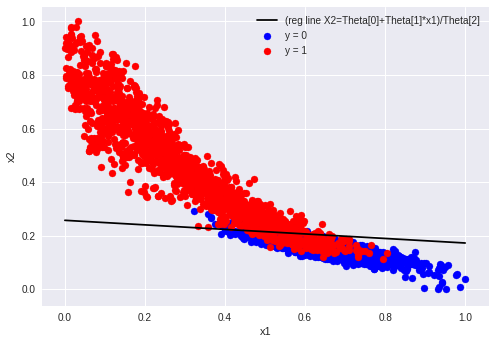

In [7]:
print("The shape of X: ", x_scaled_prepended.shape)
print("The X fitted is: ", x_scaled_prepended)
print("The fitted params are:", Theta)
plot_reg(x_scaled_prepended, Y, Theta)

##Plot the cost

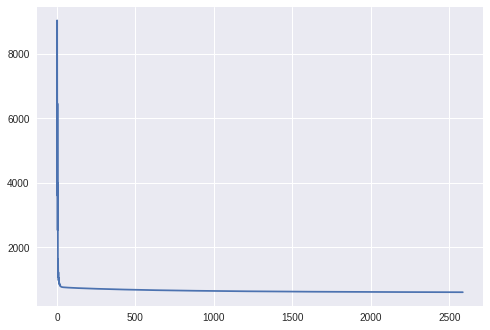

In [8]:
X = np.arange(0, len(CostList), 1)
plt.plot(X, CostList)

# 2:Apply to MNIST dataset
Here we will want to bring in two digits, then split into a train a test sample.   

##Define the performance method

In [0]:
#Define the performance method
from collections import defaultdict
def autovivify(levels=1, final=dict):
    return (defaultdict(final) if levels < 2 else
            defaultdict(lambda: autovivify(levels-1, final)))
  
def Performance(testset_X, testset_Y, Theta):
    confusionmatrix = autovivify(2, int)
    print(type(testset_X), type(testset_X[1]), testset_X[1].shape)
    print(type(testset_Y), type(testset_Y[1]), testset_Y[1].shape)
    #The predictor uses the fit to predict the outcome
    for data, label in zip(testset_X, testset_Y):
        #The label is still a ndarray, with shape (1,), we have to use label[0] to read the 0/1
        signal = label[0]
        if sigmoid(np.dot(data, Theta)) < 0.5:
            pred = 0
        else:
            pred = 1
            
        if pred == label:
            confusionmatrix[signal][signal] += 1
        else:
            confusionmatrix[signal][pred] += 1
            
    TP = confusionmatrix[1][1]
    FP = confusionmatrix[0][1]
    TN = confusionmatrix[0][0]
    FN = confusionmatrix[1][0]
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    return precision, recall, confusionmatrix

##Data preparation

In [10]:
short = "short_"
dfCombined = pd.DataFrame()
#
# Read in 5's
digit = 9
fname = 'https://raw.githubusercontent.com/big-data-analytics-physics/data/master/ch3/digit_' + short + str(digit) + '.csv'
df = pd.read_csv(fname,header=None)
df['signal'] = 0
dfCombined = pd.concat([dfCombined, df])
#
# Read in 5's
digit = 7
fname = 'https://raw.githubusercontent.com/big-data-analytics-physics/data/master/ch3/digit_' + short + str(digit) + '.csv'
df = pd.read_csv(fname,header=None)
df['signal'] = 1
dfCombined = pd.concat([dfCombined, df])

#Split the data into train and test sets.
from sklearn.model_selection import train_test_split

train_digits, test_digits = train_test_split(dfCombined, test_size=0.2, random_state=42)
print(train_digits.head(10))
print(test_digits.head())

     0  1  2  3  4  5  6  7  8  9   ...    775  776  777  778  779  780  781  \
968  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
240  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
819  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
692  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
420  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
85   0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
998  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
365  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
22   0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
240  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   

     782  783  signal  
968    0    0       0  
240    0    0       0  
819    0    0       0  
692    0    0       0  

In [11]:
from sklearn.preprocessing import MinMaxScaler
scl2 = MinMaxScaler()

print("The train_digits", train_digits.shape)
fit_start = 0
fit_end = 783
XToFit = train_digits.iloc[:, fit_start: fit_end].values
print(XToFit.shape)

#Try add some background to the data

  
x_scaled = scl2.fit_transform(XToFit)
  
print("After the scaling:", x_scaled.shape, x_scaled)
ones = np.ones((len(XToFit),1))

x_scaled_prepended = np.append(ones, x_scaled, axis=1).astype(np.float64) / 100

YToFit = train_digits['signal'].values


Y = YToFit.reshape(-1,1)
print("The X data", type(x_scaled_prepended), type(x_scaled_prepended[3][3]), x_scaled_prepended.shape, x_scaled_prepended[1])
print("The Y data", type(Y), Y.shape, Y)

The train_digits (1600, 785)
(1600, 783)
After the scaling: (1600, 783) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
The X data <class 'numpy.ndarray'> <class 'numpy.float64'> (1600, 784) [1.00000000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



##Let's now apply the fitting
I tried using different numbers of features to see if the increase of number of feature would help get better prediction. But the result is, the precision and recall didn't change much with more features used.

In [12]:
max_iteration = 4000
delta = 0.01
learningRate = 0.01

m, features = x_scaled_prepended.shape
Theta = 0.01 * np.random.randn(features, 1)

print(np.dot(x_scaled_prepended[0], Theta))

Theta, iteration, ThetaList, CostList = fit_data(x_scaled_prepended, Y, Theta, learningRate=learningRate,max_iterations=max_iteration,delta=delta)

[7.44751345e-05]
The number of datapoints:  1600 The number of features there are:  784
The max number of iterations:  4000
The initial cost of the guess is:  [1109.10762027]
0 th iteration
The cost is now:  [1107.73541161]
50 th iteration
The cost is now:  [1043.85684376]
100 th iteration
The cost is now:  [988.00515727]
150 th iteration
The cost is now:  [938.87476272]
200 th iteration
The cost is now:  [895.47026283]
250 th iteration
The cost is now:  [856.95903667]
300 th iteration
The cost is now:  [822.63667536]
350 th iteration
The cost is now:  [791.90887663]
400 th iteration
The cost is now:  [764.27564759]
450 th iteration
The cost is now:  [739.31671099]
500 th iteration
The cost is now:  [716.67849173]
550 th iteration
The cost is now:  [696.06289399]
600 th iteration
The cost is now:  [677.21783819]
650 th iteration
The cost is now:  [659.92939352]
700 th iteration
The cost is now:  [644.01529078]
750 th iteration
The cost is now:  [629.31959676]
800 th iteration
The cost 

###Plot the cost

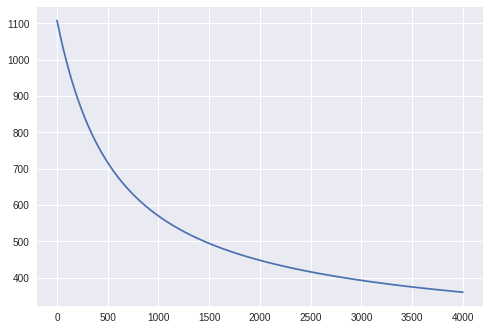

In [13]:
plt.plot(CostList)
plt.show()

###Test the fitting

Process the test samples in the same way. **We still need to devide the scaled data points by 100, so that the sigmoid can be between 0/1**

In [14]:
print("The test_digits", test_digits.shape)


XToFit = test_digits.iloc[:, fit_start: fit_end].values
YToFit = test_digits['signal'].values

print(XToFit.shape)

x_scaled = scl2.fit_transform(XToFit)
  
print("After the scaling:", x_scaled.shape, x_scaled)
ones = np.ones((len(XToFit),1))

x_scaled_prepended = np.append(ones, x_scaled, axis=1).astype(np.float64) / 100




Y = YToFit.reshape(-1,1)
print("The X data", type(x_scaled_prepended), type(x_scaled_prepended[3][3]), x_scaled_prepended.shape)
print("The Y data", type(Y), Y.shape)

The test_digits (400, 785)
(400, 783)
After the scaling: (400, 783) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
The X data <class 'numpy.ndarray'> <class 'numpy.float64'> (400, 784)
The Y data <class 'numpy.ndarray'> (400, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [15]:
precision, recall, confusionmatrix = Performance(x_scaled_prepended, Y, Theta)
print("Precision: ", precision)
print("Recall: ", recall)
print("The confusion matrix", confusionmatrix)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (784,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> (1,)
Precision:  0.9543147208121827
Recall:  0.9353233830845771
The confusion matrix defaultdict(<function autovivify.<locals>.<lambda> at 0x7f146c94a0d0>, {1: defaultdict(<class 'int'>, {1: 188, 0: 13}), 0: defaultdict(<class 'int'>, {0: 190, 1: 9})})


The precision  and recall are actually quite good.

# 3: Extra: Multi-class classification

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#short = ""
short = "short_"
dfCombined = pd.DataFrame()
#
# Read in 5's
digit = 5
fname = 'https://raw.githubusercontent.com/big-data-analytics-physics/data/master/ch3/digit_' + short + str(digit) + '.csv'
df = pd.read_csv(fname,header=None)
df['digit'] = 5
dfCombined = pd.concat([dfCombined, df])
#
# Read in 5's
digit = 6
fname = 'https://raw.githubusercontent.com/big-data-analytics-physics/data/master/ch3/digit_' + short + str(digit) + '.csv'
df = pd.read_csv(fname,header=None)
df['digit'] = 6
dfCombined = pd.concat([dfCombined, df])
#
# Read in 5's
digit = 7
fname = 'https://raw.githubusercontent.com/big-data-analytics-physics/data/master/ch3/digit_' + short + str(digit) + '.csv'
df = pd.read_csv(fname,header=None)
df['digit'] = 7
dfCombined = pd.concat([dfCombined, df])

#
# Get a test and train sample
train_digits,test_digits = train_test_split(dfCombined, test_size=0.3, random_state=42)

print(train_digits.shape, test_digits.shape)

# loop over the 3 digits

trainSubsets = {}
testSubsets = {}

#Now we need to assign signal to three cases. Then we shall merge them into our trainset.
digits = [5,6,7]
for digit in digits:
  
  background = train_digits[train_digits.iloc[:, 784] != digit]
  signal = train_digits[train_digits.iloc[:, 784] == digit]

  background['signal'] = 0
  signal['signal'] = 1
  
  trainSubsets[digit] = pd.concat([background, signal])
  print(digit, "as the signal:\n", trainSubsets[digit].head())
  print(digit, "as the signal:\n", trainSubsets[digit].tail())

for digit in digits:
  
  background = test_digits[test_digits.iloc[:, 784] != digit]
  signal = test_digits[test_digits.iloc[:, 784] == digit]

  background['signal'] = 0
  signal['signal'] = 1
  
  testSubsets[digit] = pd.concat([background, signal])
  print(digit, "as the signal:\n", testSubsets[digit].head())
  print(digit, "as the signal:\n", testSubsets[digit].tail())

(2100, 785) (900, 785)
5 as the signal:
      0  1  2  3  4  5  6  7  8  9   ...    776  777  778  779  780  781  782  \
787  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
883  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
11   0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
17   0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
390  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   

     783  digit  signal  
787    0      7       0  
883    0      6       0  
11     0      6       0  
17     0      6       0  
390    0      7       0  

[5 rows x 786 columns]
5 as the signal:
      0  1  2  3  4  5  6  7  8  9   ...    776  777  778  779  780  781  782  \
769  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
130  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
330  0  0  0  0  0  0  0  0  0  0   ... 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



6 as the signal:
      0  1  2  3  4  5  6  7  8  9   ...    776  777  778  779  780  781  782  \
611  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
530  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
787  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
49   0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
858  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   

     783  digit  signal  
611    0      5       0  
530    0      5       0  
787    0      7       0  
49     0      5       0  
858    0      5       0  

[5 rows x 786 columns]
6 as the signal:
      0  1  2  3  4  5  6  7  8  9   ...    776  777  778  779  780  781  782  \
238  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
638  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
95   0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



5 as the signal:
      0  1  2  3  4  5  6  7  8  9   ...    776  777  778  779  780  781  782  \
801  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
190  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
817  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
505  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
117  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   

     783  digit  signal  
801    0      6       0  
190    0      6       0  
817    0      6       0  
505    0      7       0  
117    0      6       0  

[5 rows x 786 columns]
5 as the signal:
      0  1  2  3  4  5  6  7  8  9   ...    776  777  778  779  780  781  782  \
482  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
438  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0    0    0    0   
856  0  0  0  0  0  0  0  0  0  0   ...      0    0    0    0  

##Fit three decision boundaries for the trainDict

In [17]:
dict = {9:0}
for this in dict.values():
  print(this)

0


In [21]:
#The list to store the fittings.
ParamsDict = {}
max_iteration = 3000
delta = 0.01
learningRate = 0.01

for trainset in trainSubsets.values():
    sclMulti = MinMaxScaler()
    print("The train_digits", trainset.shape)
    
    #Find out what digit this set is.
    digit = trainset[trainset.iloc[:, 785] == 1].iloc[1, 784]
    print("Processing signal ", digit)
    
    XToFit = trainset.iloc[:, 0:783].values
    YToFit = trainset['signal'].values
    Y = YToFit.reshape(-1,1)

    print("Raw data shape ",XToFit.shape)

    x_scaled = sclMulti.fit_transform(XToFit)
    ones = np.ones((len(XToFit),1))
    x_scaled_prepended = np.append(ones, x_scaled, axis=1).astype(np.float64) / 100

    print("The X data", type(x_scaled_prepended), type(x_scaled_prepended[3][3]), x_scaled_prepended.shape)
    print("The Y data", type(Y), Y.shape)

    m, features = x_scaled_prepended.shape
    Theta = 0.01 * np.random.randn(features, 1)
    
    print(np.dot(x_scaled_prepended[0], Theta))
    #The fitting results should be stored in a list.
    Theta, iteration, ThetaList, CostList = fit_data(x_scaled_prepended, Y, Theta, learningRate=learningRate,max_iterations=max_iteration,delta=delta)
    ParamsDict[digit] = {"Theta":Theta, "iteration":iteration, "ThetaList":ThetaList, "CostList":CostList}

The train_digits (2100, 786)
Processing signal  5
Raw data shape  (2100, 783)
The X data <class 'numpy.ndarray'> <class 'numpy.float64'> (2100, 784)
The Y data <class 'numpy.ndarray'> (2100, 1)
[0.00018032]
The number of datapoints:  2100 The number of features there are:  784
The max number of iterations:  3000
The initial cost of the guess is:  [1455.69774655]
0 th iteration
The cost is now:  [1447.88317893]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



50 th iteration
The cost is now:  [1224.34748665]
100 th iteration
The cost is now:  [1115.81045384]
150 th iteration
The cost is now:  [1034.60130242]
200 th iteration
The cost is now:  [966.75602701]
250 th iteration
The cost is now:  [908.57444342]
300 th iteration
The cost is now:  [858.17587477]
350 th iteration
The cost is now:  [814.20007228]
400 th iteration
The cost is now:  [775.56705661]
450 th iteration
The cost is now:  [741.4046136]
500 th iteration
The cost is now:  [711.0058097]
550 th iteration
The cost is now:  [683.7959283]
600 th iteration
The cost is now:  [659.30572426]
650 th iteration
The cost is now:  [637.15001401]
700 th iteration
The cost is now:  [617.0107287]
750 th iteration
The cost is now:  [598.62357945]
800 th iteration
The cost is now:  [581.76758057]
850 th iteration
The cost is now:  [566.2568066]
900 th iteration
The cost is now:  [551.93388539]
950 th iteration
The cost is now:  [538.66483873]
1000 th iteration
The cost is now:  [526.33497034]
10

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



50 th iteration
The cost is now:  [1194.00411782]
100 th iteration
The cost is now:  [1035.3960005]
150 th iteration
The cost is now:  [918.5151638]
200 th iteration
The cost is now:  [828.01965113]
250 th iteration
The cost is now:  [756.0866189]
300 th iteration
The cost is now:  [697.69866558]
350 th iteration
The cost is now:  [649.43409134]
400 th iteration
The cost is now:  [608.8968083]
450 th iteration
The cost is now:  [574.37282289]
500 th iteration
The cost is now:  [544.61100602]
550 th iteration
The cost is now:  [518.68040766]
600 th iteration
The cost is now:  [495.87584877]
650 th iteration
The cost is now:  [475.65434605]
700 th iteration
The cost is now:  [457.59151318]
750 th iteration
The cost is now:  [441.35111969]
800 th iteration
The cost is now:  [426.66346732]
850 th iteration
The cost is now:  [413.30977838]
900 th iteration
The cost is now:  [401.11075243]
950 th iteration
The cost is now:  [389.91805897]
1000 th iteration
The cost is now:  [379.60792971]
10

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



50 th iteration
The cost is now:  [1142.68129319]
100 th iteration
The cost is now:  [980.69080287]
150 th iteration
The cost is now:  [865.61910545]
200 th iteration
The cost is now:  [777.32204759]
250 th iteration
The cost is now:  [707.3986652]
300 th iteration
The cost is now:  [650.79444678]
350 th iteration
The cost is now:  [604.1110815]
400 th iteration
The cost is now:  [564.97745325]
450 th iteration
The cost is now:  [531.7013968]
500 th iteration
The cost is now:  [503.05096534]
550 th iteration
The cost is now:  [478.1121483]
600 th iteration
The cost is now:  [456.19465822]
650 th iteration
The cost is now:  [436.76851278]
700 th iteration
The cost is now:  [419.42061107]
750 th iteration
The cost is now:  [403.82448277]
800 th iteration
The cost is now:  [389.71885606]
850 th iteration
The cost is now:  [376.89222682]
900 th iteration
The cost is now:  [365.1715788]
950 th iteration
The cost is now:  [354.41402036]
1000 th iteration
The cost is now:  [344.50050109]
1050

##Plot the cost change for three digits

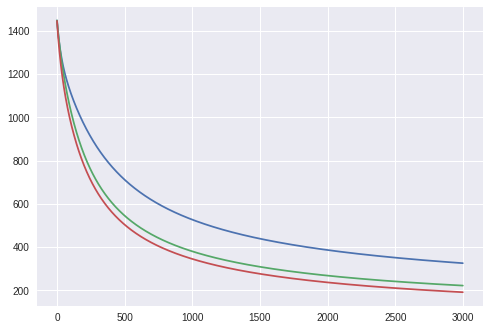

In [22]:
plt.plot(ParamsDict[5]['CostList'], label= 'Digit 5')
plt.plot(ParamsDict[6]['CostList'], label= 'Digit 6')
plt.plot(ParamsDict[7]['CostList'], label= 'Digit 7')
plt.show()

##Test the decision boundaries

In [23]:
#ParamsDict[digit] = {"Theta":Theta, "iteration":iteration, "ThetaList":ThetaList, "CostList":CostList}
EvaluationDict = {}
for testset in testSubsets.values():
    sclMulti = MinMaxScaler()
    print("The train_digits", testset.shape)
    
    #Find out what digit this set is.
    digit = testset[testset.iloc[:, 785] == 1].iloc[1, 784]
    print("Evaluating signal prediction of digit ", digit)
    
    
    XToFit = testset.iloc[:, 0:783].values
    YToFit = testset['signal'].values
    Y = YToFit.reshape(-1,1)

    print("Raw data shape ",XToFit.shape)

    x_scaled = sclMulti.fit_transform(XToFit)
    ones = np.ones((len(XToFit),1))
    x_scaled_prepended = np.append(ones, x_scaled, axis=1).astype(np.float64) / 100

    print("The X data", type(x_scaled_prepended), type(x_scaled_prepended[3][3]), x_scaled_prepended.shape)
    print("The Y data", type(Y), Y.shape)
    
    precision, recall, confusionmatrix = Performance(x_scaled_prepended, Y, ParamsDict[digit]["Theta"])    
    EvaluationDict[digit] = {"precision":precision, "recall":recall, "confusionmatrix":confusionmatrix}
    

The train_digits (900, 786)
Evaluating signal prediction of digit  5
Raw data shape  (900, 783)
The X data <class 'numpy.ndarray'> <class 'numpy.float64'> (900, 784)
The Y data <class 'numpy.ndarray'> (900, 1)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> (784,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> (1,)
The train_digits (900, 786)
Evaluating signal prediction of digit  6
Raw data shape  (900, 783)
The X data <class 'numpy.ndarray'> <class 'numpy.float64'> (900, 784)
The Y data <class 'numpy.ndarray'> (900, 1)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> (784,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> (1,)
The train_digits (900, 786)
Evaluating signal prediction of digit  7
Raw data shape  (900, 783)
The X data <class 'numpy.ndarray'> <class 'numpy.float64'> (900, 784)
The Y data <class 'numpy.ndarray'> (900, 1)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> (784,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> (1,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



##Performance evaluation for three digits is here

In [24]:
#EvaluationDict[digit] = {"precision":precision, "recall":recall, "confusionmatrix":confusionmatrix}
for key in EvaluationDict.keys():
    print("Evaluation result for digit ", key)
    print("Precision: ", EvaluationDict[digit]["precision"])
    print("Recall: ", EvaluationDict[digit]["recall"])
    print("The confusion matrix", EvaluationDict[digit]["confusionmatrix"])

Evaluation result for digit  5
Precision:  0.9895104895104895
Recall:  0.956081081081081
The confusion matrix defaultdict(<function autovivify.<locals>.<lambda> at 0x7f147014d8c8>, {0: defaultdict(<class 'int'>, {0: 601, 1: 3}), 1: defaultdict(<class 'int'>, {1: 283, 0: 13})})
Evaluation result for digit  6
Precision:  0.9895104895104895
Recall:  0.956081081081081
The confusion matrix defaultdict(<function autovivify.<locals>.<lambda> at 0x7f147014d8c8>, {0: defaultdict(<class 'int'>, {0: 601, 1: 3}), 1: defaultdict(<class 'int'>, {1: 283, 0: 13})})
Evaluation result for digit  7
Precision:  0.9895104895104895
Recall:  0.956081081081081
The confusion matrix defaultdict(<function autovivify.<locals>.<lambda> at 0x7f147014d8c8>, {0: defaultdict(<class 'int'>, {0: 601, 1: 3}), 1: defaultdict(<class 'int'>, {1: 283, 0: 13})})


Got at least decent precisions and recalls for each digit prediction.